**Heart Disease Prediction with Neural Networks**

I chose this to be my very first Kernel on Kaggle, as in fact I quite enjoy the applications of Machine learning and how it impacts our lives. I am an *absolute beginner* as well and just breaking into the field. Thus, this kernel is more focused for learning purposes and exploration. Please feel free to give advice, recommendations/ better approaches or whatsover on the code below.

The heart disease data-set is a quite small dataset with today's modern standards. In this kernel first, I'll do a small bit of data exploration then, I try to create a very simple and straightforward model. That we analyze later, and try to improve its performance.

First of all, lets add all packages that we will use.

In [142]:
# Import packages that we will be working with.
import os
import numpy as np
import pandas as pd
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

#print(os.listdir("../input"))
np.random.seed(10)

**Dataset**

Lets load the dataset, and check its components. 

In [143]:
# Load the dataset, and view couple of the first rows.
data = pd.read_csv("heart.csv")
print(data.head(3))

# Check the datatypes
print(data.dtypes)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


So far we have a dataframe that containts all of our data. However we need to split to training data and target labels for learning. Then split the dataset into a train/test sets.

We do that in the following block of code.

In [144]:
# At this moment we have a dataframe that contains all of the heart.csv data. However we need to
# Separate them to [X, Y]. Where our target labels are 'Y', and 'X' is our training data.
Y = data.target.values
X = data.drop(['target'], axis=1)

# Now split to train/test with 80% training data, and 20% test data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train, X_train2, Y_train, Y_train2 = train_test_split(X_train, Y_train, test_size=0.9)

# Check dimensions of both sets.
print("Train Features Size:", X_train.shape)
print("Test Features Size:", X_test.shape)
print("Train Labels Size:", Y_train.shape)
print("Test Labels Size:", Y_test.shape)

Train Features Size: (24, 13)
Test Features Size: (61, 13)
Train Labels Size: (24,)
Test Labels Size: (61,)


**Neural Network Model**

Lets create a function that we can call later that builds our Neural Network model, and takes in the learning rate as a parameter. The architecture of the Neural Network that we're going to implement is detailed in the below illustration.
![](https://raw.githubusercontent.com/3absamad/machine-learning/master/Kaggle/imgs/Kaggle_heart_disease_NN_model.png)
In our model, we use `Adam` (Adaptive Momentum) as our optimization algorithm, and set our metrics to `accuracy`. Furthermore, I have used the loss function to be `sparse_categorical_crossentropy` because our traget labels are *integers* and not one hot encoded.


In [145]:
# Define a Neural Network Model

def NN_model(learning_rate):
    model = Sequential()
    model.add(Dense(32, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation='softmax'))
    Adam(lr=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

Now lets build the NN-model and start training. I chose `learning_rate=0.01`, `epochs=100`, and `batch_size=16`. 

Training the model for 100 epochs, seems to be pretty fine in order to avoid overfitting. I already performed training with 1000 epochs and around 100 epochs was the reasonable number of epochs for early stopping.

Lets take a look at our model summary.

In [146]:
# Build a NN-model, and start training
learning_rate = 0.01
model = NN_model(learning_rate)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_52 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_53 (Dense)             (None, 2)                 34        
Total params: 1,010
Trainable params: 1,010
Non-trainable params: 0
_________________________________________________________________
None


Now we train the network.

In [147]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=16, verbose=2)


Train on 24 samples, validate on 61 samples
Epoch 1/100
 - 1s - loss: 1.1109 - acc: 0.5000 - val_loss: 0.7646 - val_acc: 0.5082
Epoch 2/100
 - 0s - loss: 0.6487 - acc: 0.6250 - val_loss: 0.6957 - val_acc: 0.5902
Epoch 3/100
 - 0s - loss: 0.7790 - acc: 0.5833 - val_loss: 0.7723 - val_acc: 0.5738
Epoch 4/100
 - 0s - loss: 0.7816 - acc: 0.5000 - val_loss: 0.6581 - val_acc: 0.6066
Epoch 5/100
 - 0s - loss: 0.6575 - acc: 0.6250 - val_loss: 0.6313 - val_acc: 0.6230
Epoch 6/100
 - 0s - loss: 0.5716 - acc: 0.7500 - val_loss: 0.7035 - val_acc: 0.4918
Epoch 7/100
 - 0s - loss: 0.6603 - acc: 0.5833 - val_loss: 0.7716 - val_acc: 0.4918
Epoch 8/100
 - 0s - loss: 0.6940 - acc: 0.5417 - val_loss: 0.7308 - val_acc: 0.5082
Epoch 9/100
 - 0s - loss: 0.6556 - acc: 0.5833 - val_loss: 0.6558 - val_acc: 0.6557
Epoch 10/100
 - 0s - loss: 0.6158 - acc: 0.6667 - val_loss: 0.6219 - val_acc: 0.6557
Epoch 11/100
 - 0s - loss: 0.5907 - acc: 0.6250 - val_loss: 0.6210 - val_acc: 0.6885
Epoch 12/100
 - 0s - loss: 0.6

Epoch 97/100
 - 0s - loss: 0.3985 - acc: 0.8333 - val_loss: 0.6342 - val_acc: 0.6885
Epoch 98/100
 - 0s - loss: 0.3810 - acc: 0.8750 - val_loss: 0.6315 - val_acc: 0.6885
Epoch 99/100
 - 0s - loss: 0.3667 - acc: 0.8333 - val_loss: 0.6299 - val_acc: 0.6721
Epoch 100/100
 - 0s - loss: 0.3667 - acc: 0.9167 - val_loss: 0.6316 - val_acc: 0.6885


We plot the `Model Accuracy`, and `Model Loss`  vs. the number of `Epochs`.

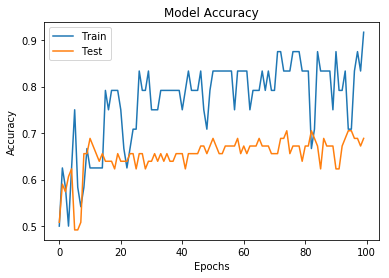

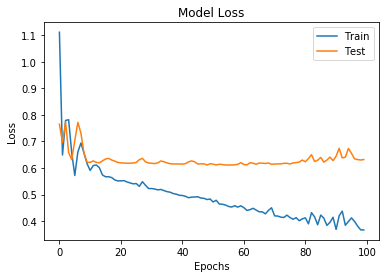

In [148]:
# Plot the model accuracy vs. number of Epochs
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

# Plot the Loss function vs. number of Epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

Evaluating our model's performance, we define the f1 score to be:

$$f1 = \frac{precision^{-1} + recall^{-1}}{2}$$


$$precision = \frac{\textit{true positives}}{\textit{true positives} + \textit{false positives}}$$

$$recall = \frac{\textit{true positives}}{\textit{true positives} + \textit{false negatives}}$$

Check this [Wikipedia](http://https://en.wikipedia.org/wiki/Precision_and_recall) page for more details on precision and recall.

We compute our model's predictions on the test set `X_test` and print a `classfication_report` from the imported package `sklearn.metrics`.

In [149]:
predictions = np.argmax(model.predict(X_test), axis=1)
model_accuracy = 100-(accuracy_score(Y_test, predictions)*100)
print("Model Accracy:", model_accuracy,"%")
print(classification_report(Y_test, predictions))

Model Accracy: 31.14754098360656 %
              precision    recall  f1-score   support

           0       0.68      0.86      0.76        35
           1       0.71      0.46      0.56        26

   micro avg       0.69      0.69      0.69        61
   macro avg       0.69      0.66      0.66        61
weighted avg       0.69      0.69      0.67        61



With a model accuracy of around 88% and very similar $f1$ score, we have a very good performing model that generalizes well to the test set.